In [341]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import matrix_power

In [322]:
def get_w(X,y):
    w = ((np.linalg.inv((np.transpose(X).dot(X))).dot(np.transpose(X))).dot(y))
    return w

In [382]:
def det_MSE(X,w,y):
    y = np.matrix(y)
    w = w.T
    y = y.T
    m, n = X.shape
    MSE = 1.0/m * (np.transpose(X.dot(w)-y)).dot(X.dot(w)-y)

    return MSE.item(0)

In [383]:
def get_basis(x, k):
    fi = []
    for i in range(0,k):
        fi.append(np.power(x, i))
    return np.matrix(fi).T

In [384]:
def plot_poly(w, range_min=0, range_max=5):
    degree = w.shape[1]
    x = np.linspace(range_min, range_max,100)
    x.reshape(100,1)
    y = 0
    for i in range(0, degree):
        y = y + w.item(i)*x**i
    
    plt.plot(x ,y,'-')
    

## Question 1

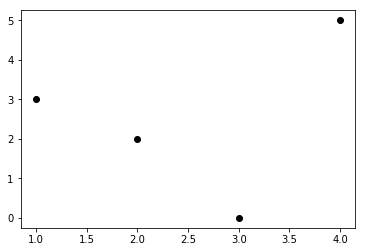

In [385]:
x = [1,2,3,4]
y = [3,2,0,5]
plt.plot(x,y, 'ko')
plt.show()

Weights (W):  [[2.5]]
MSE: 3.25
Weights (W):  [[1.5 0.4]]
MSE: 3.05
Weights (W):  [[ 9.  -7.1  1.5]]
MSE: 0.8
Weights (W):  [[-5.         15.16666667 -8.5         1.33333333]]
MSE: 3.49014909882e-23


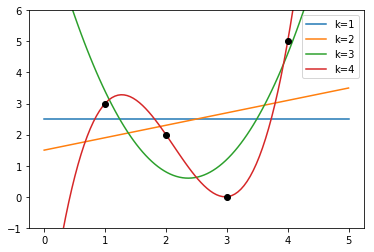

In [386]:
for k in range(1,5):

    fi = get_basis(x, k)
    w = get_w(fi,y)
    plot_poly(w, 0, 5)
    print "Weights (W): ", w
    print "MSE: " + str(det_MSE(fi,w,y))

plt.ylim(-1, 6)
plt.plot(x,y, 'ko')
plt.legend(('k=1', 'k=2', 'k=3', 'k=4'))
plt.show()

## Question 2

In [412]:
def generate_sine_data(range_min=0, range_max=1, num_points=30, eps_mean=0, eps_std=0.07, seed=1):
    np.random.seed(seed)
    x = np.random.uniform(range_min, range_max, num_points)
    eps = np.random.normal(eps_mean, eps_std, num_points)
    g = ((np.sin(2*np.pi*x)))**2 + eps 
    
    return x, g

In [413]:
def plot_sin():
    x = np.linspace(0,1,100)
    y = (np.sin(2*np.pi*x))**2

    plt.plot(x,y)

    x, g = generate_sine_data(range_min=0, range_max=1, num_points=30, eps_mean=0, eps_std=0.07, seed=1)

    plt.plot(x,g,'o')
    plt.show()

    return x, g
    #regression(x,g)

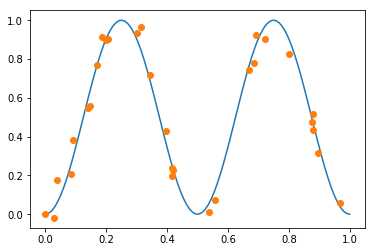

In [414]:
x, y = plot_sin()

MSE: 0.107037598695
MSE: 0.0422316129914
MSE: 0.00201877470519
MSE: 0.00881259141658
MSE: 0.00572838756168


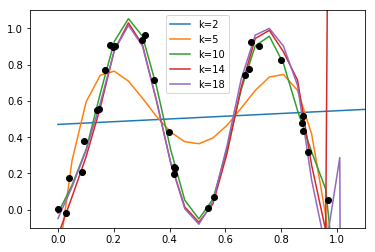

In [406]:
k_array = [2,5,10,14,18]
for k in k_array:

    fi = get_basis(x, k)
    w = get_w(fi,y)
    plot_poly(w, 0, 5)
    #print "Weights (W): ", w
    print "MSE: " + str(det_MSE(fi,w,y))

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.plot(x,y, 'ko')
plt.legend(('k=2', 'k=5', 'k=10', 'k=14', 'k=18'))
plt.show()

In [420]:
te = []
w_array = []
for k in range(1,19):

    fi = get_basis(x, k)
    w = get_w(fi,y)
    w_array.append(w)
    print "MSE: " + str(det_MSE(fi,w,y))
    te.append(det_MSE(fi,w,y))

MSE: 0.107550718521
MSE: 0.107037598695
MSE: 0.0941440950103
MSE: 0.0913556624969
MSE: 0.0422316129914
MSE: 0.0415088636064
MSE: 0.00718849395066
MSE: 0.00489276093034
MSE: 0.00204005171167
MSE: 0.00201877470519
MSE: 0.00182629049728
MSE: 0.0018406407552
MSE: 0.00217779387694
MSE: 0.00881259141658
MSE: 0.0334534130791
MSE: 0.00593377997945
MSE: 0.00869902320251
MSE: 0.00572838756168


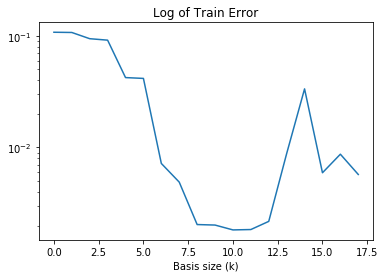

In [421]:
plt.semilogy(te)
plt.title("Log of Train Error")
plt.xlabel("Basis size (k)")
plt.show()

In [404]:
w_array[0]

matrix([[0.50341038]])

In [415]:
x_test, y_test = generate_sine_data(range_min=0, range_max=1, num_points=1000, eps_mean=0, eps_std=0.07, seed=1)

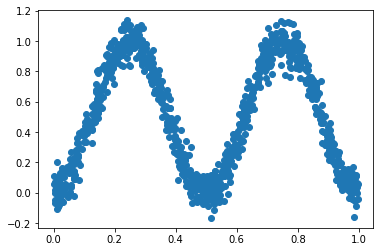

In [418]:
plt.plot(x_test, y_test, 'o')

In [426]:
tse = []
for k in range(1,19):

    fi_test = get_basis(x_test, k)
    
    MSE = det_MSE(fi_test, w_array[k-1], y_test)
    print "MSE: " + str(MSE)
    tse.append(MSE)

MSE: 0.131136724474
MSE: 0.131374803852
MSE: 0.127126966087
MSE: 0.128820202282
MSE: 0.0512878851271
MSE: 0.0518155501208
MSE: 0.00804876049245
MSE: 0.012112569668
MSE: 0.00708756472359
MSE: 0.00790098494065
MSE: 0.00824316456024
MSE: 0.0229140864779
MSE: 0.0249200478322
MSE: 0.224273200761
MSE: 0.148259756085
MSE: 0.176087274655
MSE: 0.700196873337
MSE: 0.0117970329965


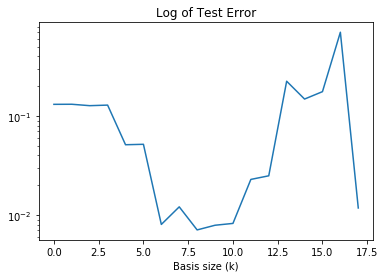

In [429]:
plt.semilogy(tse)
plt.title("Log of Test Error")
plt.xlabel("Basis size (k)")
plt.show()

## Smoothed out (average over 100 runs)

In [503]:
te = []
tse = []
for k in range(1,19):
    
    MSE_list = []
    MSE_test_list = []
    for i in range(1, 101):
        try:
            #Generate new train and test set with different random seeds
            x, y = generate_sine_data(range_min=0, range_max=1, num_points=30, eps_mean=0, eps_std=0.07, seed=i)
            x_test, y_test = generate_sine_data(range_min=0, range_max=1, num_points=1000, eps_mean=0, eps_std=0.07, seed=1)

            fi = get_basis(x, k)
            w = get_w(fi,y)
            fi_test = get_basis(x_test, k)

            MSE_list.append(det_MSE(fi,w,y))
            MSE_test_list.append(det_MSE(fi_test, w, y_test))
        except:
            continue

    te.append(np.array(MSE_list).mean())
    tse.append(np.array(MSE_test_list).mean())

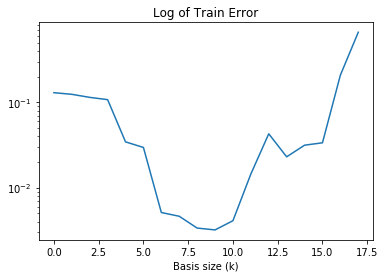

In [504]:
plt.semilogy(te)
plt.title("Log of Train Error")
plt.xlabel("Basis size (k)")
plt.show()

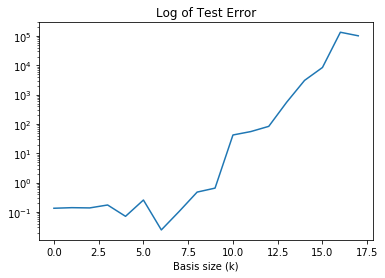

In [505]:
plt.semilogy(tse)
plt.title("Log of Test Error")
plt.xlabel("Basis size (k)")
plt.show()

## Question 3

In [548]:
def get_sin_basis(x, k):
    Fi = []
    for i in range(1,k+1):
        fi = np.sin(i*np.pi*x)
        Fi.append(fi)
    return np.matrix(Fi).T


       # fi.append(np.sin(i*np.pi*x))


In [553]:
te = []
w_array = []
for k in range(1,19):

    fi = get_sin_basis(x, k)
    w = get_w(fi,y)
    w_array.append(w)
    print "MSE: " + str(det_MSE(fi,w,y))
    te.append(det_MSE(fi,w,y))

MSE: 0.128948666036
MSE: 0.128193360536
MSE: 0.0206537668186
MSE: 0.0206329273836
MSE: 0.00531681952292
MSE: 0.00530417551349
MSE: 0.004691732935
MSE: 0.00439261507186
MSE: 0.00427862710414
MSE: 0.00384382340785
MSE: 0.00355419657574
MSE: 0.00352719147086
MSE: 0.0034694500872
MSE: 0.00346113396405
MSE: 0.00342253566765
MSE: 0.00320722842787
MSE: 0.00313979874452
MSE: 0.00313838532896


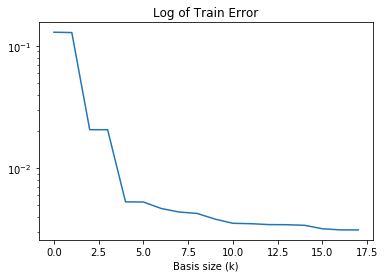

In [554]:
plt.semilogy(te)
plt.title("Log of Train Error")
plt.xlabel("Basis size (k)")
plt.show()

In [555]:
x_test, y_test = generate_sine_data(range_min=0, range_max=1, num_points=1000, eps_mean=0, eps_std=0.07, seed=1)

In [556]:
tse = []
for k in range(1,19):

    fi_test = get_basis(x_test, k)
    
    MSE = det_MSE(fi_test, w_array[k-1], y_test)
    print "MSE: " + str(MSE)
    tse.append(MSE)

MSE: 0.27524572896
MSE: 0.281794777158
MSE: 0.272866705735
MSE: 0.270956029214
MSE: 0.237550512716
MSE: 0.236261136545
MSE: 0.225245993617
MSE: 0.231910710914
MSE: 0.240835768399
MSE: 0.248970877008
MSE: 0.24009281015
MSE: 0.24587719943
MSE: 0.251755243834
MSE: 0.248480594828
MSE: 0.252361690276
MSE: 0.252823543188
MSE: 0.22764140104
MSE: 0.222381396513


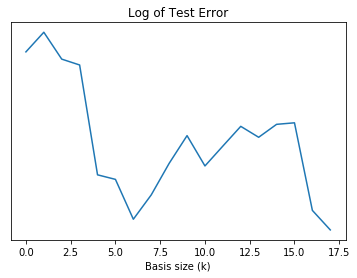

In [557]:
plt.semilogy(tse)
plt.title("Log of Test Error")
plt.xlabel("Basis size (k)")
plt.show()

In [558]:
te = []
tse = []
for k in range(1,19):
    
    MSE_list = []
    MSE_test_list = []
    for i in range(1, 101):
        try:
            #Generate new train and test set with different random seeds
            x, y = generate_sine_data(range_min=0, range_max=1, num_points=30, eps_mean=0, eps_std=0.07, seed=i)
            x_test, y_test = generate_sine_data(range_min=0, range_max=1, num_points=1000, eps_mean=0, eps_std=0.07, seed=1)

            fi = get_basis(x, k)
            w = get_w(fi,y)
            fi_test = get_basis(x_test, k)

            MSE_list.append(det_MSE(fi,w,y))
            MSE_test_list.append(det_MSE(fi_test, w, y_test))
        except:
            continue

    te.append(np.array(MSE_list).mean())
    tse.append(np.array(MSE_test_list).mean())

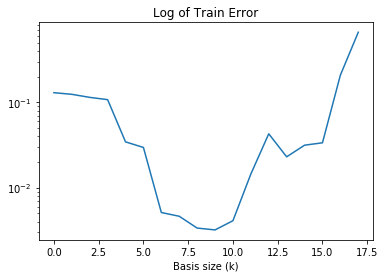

In [559]:
plt.semilogy(te)
plt.title("Log of Train Error")
plt.xlabel("Basis size (k)")
plt.show()

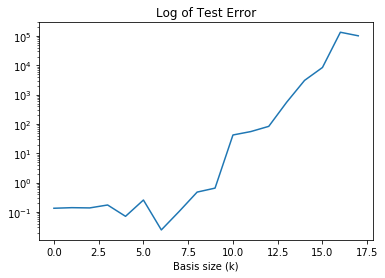

In [560]:
plt.semilogy(tse)
plt.title("Log of Test Error")
plt.xlabel("Basis size (k)")
plt.show()